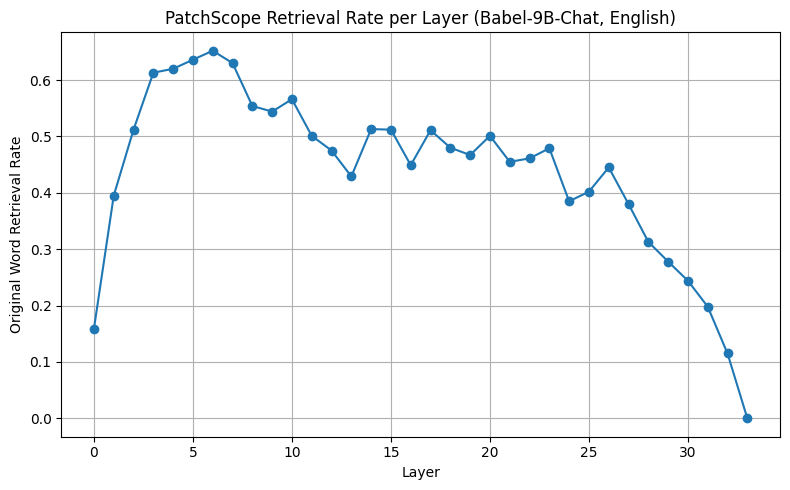

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

MODEL_NAME = "Tower-Babel/Babel-9B-Chat"
LANGUAGE = "English"
MODEL_NAME = MODEL_NAME.split("/")[-1]  # Extract model name from the full path

df = pd.read_csv(f"/home/hyujang/multilingual-inner-lexicon/output/RQ1/WordIdentity/multi_token_{MODEL_NAME}_{LANGUAGE}.csv")
df['retrieved'] = df.apply(lambda row: str(row['word']) in str(row['patchscope_result']), axis=1)

# Group by layer and compute retrieval rate
retrieval_rate = df.groupby('layer')['retrieved'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(retrieval_rate.index, retrieval_rate.values, marker='o')
plt.xlabel("Layer")
plt.ylabel("Original Word Retrieval Rate")
plt.title(f"PatchScope Retrieval Rate per Layer ({MODEL_NAME}, {LANGUAGE})")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
df

,word,layer,patchscope_result,retrieved
0,commotes,0,oteso\nNext,False
1,commotes,1,2) 2,False
2,commotes,2,2) 2,False
3,commotes,3,commotes\nNext is,True
4,commotes,4,commotes\nNext is,True
...,...,...,...,...
33995,corridor,29,corridor.\nNext is the,True
33996,corridor,30,corridor.\nNext is the,True
33997,corridor,31,corridor.\nNext is the,True
33998,corridor,32,corridor\nNext is the,True


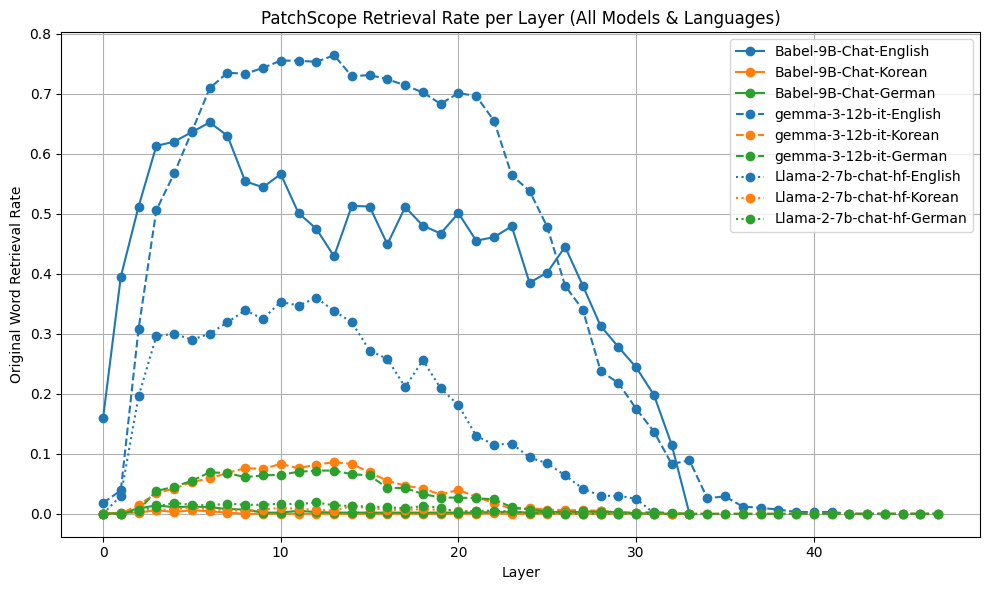

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

models = [
    "Tower-Babel/Babel-9B-Chat",
    "google/gemma-3-12b-it",
    "meta-llama/Llama-2-7b-chat-hf"
]
languages = ["English", "Korean", "German"]
# Define colors for each language
language_colors = {
    "English": "#1f77b4",
    "Korean": "#ff7f0e",
    "German": "#2ca02c"
}

# Define line styles for each model
model_styles = {
    "Babel-9B-Chat": "-",
    "gemma-3-12b-it": "--",
    "Llama-2-7b-chat-hf": ":"
}

plt.figure(figsize=(10, 6))

for model in models:
    model_short = model.split("/")[-1]
    for lang in languages:
        # Load CSV
        path = f"/home/hyujang/multilingual-inner-lexicon/output/RQ1/WordIdentity/multi_token_{model_short}_{lang}.csv"
        df = pd.read_csv(path)
        df['retrieved'] = df.apply(lambda row: str(row['word']) in str(row['patchscope_result']), axis=1)
        retrieval_rate = df.groupby('layer')['retrieved'].mean()
        plt.plot(
            retrieval_rate.index,
            retrieval_rate.values,
            marker='o',
            label=f"{model_short}-{lang}",
            color=language_colors.get(lang, "black"),  # Use the color for the language
            linestyle=model_styles.get(model_short, "dashdot"),  # Use the line style for the model

        )

plt.xlabel("Layer")
plt.ylabel("Original Word Retrieval Rate")
plt.title("PatchScope Retrieval Rate per Layer (All Models & Languages)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()